<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/02_analysis_quali_and_temporal_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Exploratory statistics </h1> 
<h2 style = "text-align:center"> Descriptive analysis of qualitative variables in a dataset </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Context and objective

> Analyzing qualitative variables is an important step in understanding data, as they often provide valuable information about the interaction between variables in the dataset. <br>
> In general, they are more difficult to manipulate than numerical variables, and it is important to observe their relationship with the latter. <br>
> 
>
> The objective of this notebook is to **determine the modalities of a qualitative variable** and to see how it **interacts with a quantitative and temporal variable**. <br>
> This notebook will also familiarize you with simple methods of data management and date column management, as well as teach you how to graphically display the evolution of a measurement over time and the different modalities of a qualitative variable.
>
> Let's start by importing the packages.


* **(a)** Import the **`pandas`** and **`numpy`** packages under their usual aliases.
* **(b)** Load the data from the **`‘OilWell_Quali_Temporal.csv’`** file into a table named **`df`** and display the first 5 rows.

> The dataset contains information on bike rentals in Porto during 2011 and 2012. For each row, we have the following information: 
>
> |Variable|Description|
> |----------|------------|
> |**`'datetime’`**|the date and time when the rentals took place|
> |**`'business_day’`**|0 - if the day is a business day 1 - otherwise|
> |**`'weather_conditions’`**| (1) clear, (2) cloudy, (3) rain or storm, (4) snow|
> |**`'temperature’`**| the average temperature for the day (in °C) |
> |**`'humidity’`**| relative humidity |
> |**`'wind_speed’`**| wind speed (in km/h)|
> |**`'holidays’`**| whether or not it is a holiday |
> |**`'season’`**| the season |
> |**`'no_rentals’`**| the number of rentals at that time |


> |**`'Well_ID'`**|
> |**`'Region'`**|
> |**`'Operator'`**|
> |**`'Maintenance_Type'`**|
> |**`'Shift’`**|
> |**`'Equipment_Status'`**|
> |**`'Weather_Condition'`**|
> |**`'Alert_Level'`**|
> |**`'Production_Date'`**|
> |**`'Last_Maintenance_Date'`**|
> |**`'No_of_Incidents'`**|
> |**`'Production_Barrels'`**|
> |**`'Temperature_C'`**|





In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/data/"
df = pd.read_csv(url+"OilWell_Quali_Temporal.csv")

# Quick look
display(df.head())



,Well_ID,Region,Operator,Maintenance_Type,Shift,Equipment_Status,Weather_Condition,Alert_Level,Production_Date,Last_Maintenance_Date,No_of_Incidents,Production_Barrels,Temperature_C
0,W-001,Qatar,BP,Emergency,Night,Standby,Rainy,Low,2024-05-04,2022-10-13,3,462.420386,42.385730
1,W-002,Algeria,BP,Emergency,Day,Active,Sunny,Critical,2024-06-10,2023-10-28,3,149.505075,38.535202
2,W-003,North Sea,BP,Corrective,Day,Standby,Windy,Medium,2024-04-08,2023-10-04,2,477.106120,33.122944
3,W-004,Algeria,BP,Routine,Night,Standby,Sandstorm,Medium,2024-02-07,2023-02-25,5,264.236223,33.715355
4,W-005,Algeria,Chevron,Corrective,Night,Failure,Rainy,High,2023-01-20,2022-11-11,3,371.516895,36.817187



* **(c)** Afficher le type de chaque variable du jeu de données **`df`** en utilisant l'attribut **`dtypes`** de `pandas.DataFrame`. 



In [25]:
display(df.dtypes)

# display(df.info())
#display(df.describe(include='all'))

Well_ID                   object
Region                    object
Operator                  object
Maintenance_Type          object
Shift                     object
Equipment_Status          object
Weather_Condition         object
Alert_Level               object
Production_Date           object
Last_Maintenance_Date     object
No_of_Incidents            int64
Production_Barrels       float64
Temperature_C            float64
dtype: object


<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" > 1. Analyse descriptive d'une variable qualitative </h3>  
<hr style="border-width:2px;border-color:#75DFC1">

* **(d)** Identify the **categorical variables** and store them in a table named **`cat_data`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    You can use the <code>pandas.DataFrame.select_dtypes()</code> function and the <code>include</code> attribute, which you can populate with a list of the type(s) you want to keep (in this case, “object” or “O”).
</div>




In [3]:
cat_data = df.select_dtypes(include='object')
cat_data.head()



,Well_ID,Region,Operator,Maintenance_Type,Shift,Equipment_Status,Weather_Condition,Alert_Level,Production_Date,Last_Maintenance_Date
0,W-001,Qatar,BP,Emergency,Night,Standby,Rainy,Low,2024-05-04,2022-10-13
1,W-002,Algeria,BP,Emergency,Day,Active,Sunny,Critical,2024-06-10,2023-10-28
2,W-003,North Sea,BP,Corrective,Day,Standby,Windy,Medium,2024-04-08,2023-10-04
3,W-004,Algeria,BP,Routine,Night,Standby,Sandstorm,Medium,2024-02-07,2023-02-25
4,W-005,Algeria,Chevron,Corrective,Night,Failure,Rainy,High,2023-01-20,2022-11-11



* **(e)** Using the **`value_counts`** method, display the count of different modalities for the variables **`"Weather_Condition"`**, **`"Alert_Level"`**, and **`"Region"`**.




In [4]:
print(cat_data["Weather_Condition"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["Alert_Level"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["Region"].value_counts(normalize = True))


Windy        0.218
Sandstorm    0.204
Cloudy       0.203
Rainy        0.194
Sunny        0.181
Name: Weather_Condition, dtype: float64
------------------------------
High        0.264
Low         0.252
Medium      0.252
Critical    0.232
Name: Alert_Level, dtype: float64
------------------------------
Abu Dhabi    0.210
Qatar        0.206
Algeria      0.204
North Sea    0.190
Texas        0.190
Name: Region, dtype: float64



> **`value_counts`** is commonly used to quickly visualize the modalities of a variable.
You can also easily find the most frequent mode of a qualitative variable using the **`mode`** method.

* **(f)**  Display **the most frequent mode** of the **`"Region"`** column and check that it matches the result found previously.



In [5]:
df['Region'].mode()
# Indeed, Abu Dhabi is the most frequent mode
# (it appears 2,734 times according to the result of .value_counts())


0    Abu Dhabi
Name: Region, dtype: object


 > First, it is important to clearly identify and study the **frequency of modalities**. The quickest way to do this is by using **`.value_counts(normalize = True)`**. This parameter allows you to normalize these values and thus calculate the percentages for each modality. 
 
 * **(g)** Display the frequencies of different modalities of the variables **`"Weather_Condition"`**, **`"Alert_Level"`**, and **`"Region"`**.



In [6]:
print(cat_data["Weather_Condition"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["Alert_Level"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["Region"].value_counts(normalize = True))


Windy        0.218
Sandstorm    0.204
Cloudy       0.203
Rainy        0.194
Sunny        0.181
Name: Weather_Condition, dtype: float64
------------------------------
High        0.264
Low         0.252
Medium      0.252
Critical    0.232
Name: Alert_Level, dtype: float64
------------------------------
Abu Dhabi    0.210
Qatar        0.206
Algeria      0.204
North Sea    0.190
Texas        0.190
Name: Region, dtype: float64



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center"> 2. Interaction between a qualitative variable and a quantitative variable </h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> Based on the previous question, we can see that there are far fewer bike rentals during the holidays. 
As for the seasons, the distribution is uniform.<br>
>
> To add more context, it would be interesting to create a qualitative variable that categorizes temperatures according to given **labels**.

* **(h)** In a new variable **`"temperature_labels"`**, divide the values in the column **`"Temperature_C"`** into **four distinct classes** with **labels** $0, 1, 2, 3$ based on the quartiles of the variable **`"Temperature_C"`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Use <code>pandas.qcut(column, labels = [...], q = 4)</code>.
</div>



In [7]:
df['temperature_labels'] = pd.qcut(df['Temperature_C'], labels = [0, 1, 2, 3], q = 4)
df[['Temperature_C','temperature_labels']].head()



,Temperature_C,temperature_labels
0,42.385730,3
1,38.535202,3
2,33.122944,1
3,33.715355,1
4,36.817187,2



* **(i)** Store **the total number of incidents** in a new variable **`group_incident_labels`** based on the qualitative variables **`"temperature_labels"`** and **`"holidays"`**. Display this new dataframe.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
<code>pandas.groupby([column_list]).agg({“column1”:“operation”, ‘column2’:“operation”, ..})</code> <br>
 
allows you to group data based on the <code>[column_list]</code> and aggregate based on <code>column1, column2, ...</code>, applying the specified operation (this can be <code><b>sum, mean, min, max, unique</b></code>, etc.).
</div>



In [8]:
group_incident_labels = df.groupby(['Alert_Level', 'temperature_labels'])\
                        .agg({'No_of_Incidents': 'sum'})

# Note: the backslash “\” at the end of the first line of code
# allows operations to continue on the second line. 
# This can be useful if visibility is limited and you don't want to 
# chain all operations on the same line.

# We calculate the sum of the No_Incidents column to get the total number 
# of rentals.
print(group_incident_labels)


                                No_of_Incidents
Alert_Level temperature_labels                 
Critical    0                               161
            1                               205
            2                               152
            3                               195
High        0                               173
            1                               197
            2                               265
            3                               186
Low         0                               231
            1                               169
            2                               142
            3                               180
Medium      0                               208
            1                               227
            2                               187
            3                               148



> We observe that during vacation days and for a temperature label equal to $3$, i.e., when the temperature is above the 3rd quartile (here $26.24°C$ using `df[“temperature”].describe()`), there were a total of $29070$ rentals.
>
> To add a new column that will also calculate the **average number** of rentals, we can enter a **list of functions** to be executed (in the **`.agg()`** parameter) for the numeric variable **`“No_of_Incidents”`**.

* **(j)** Create a new variable **`group_incident_labels2`** by adding a column to the previous groupby with the average number of incidents based on the columns **`"temperature_labels"`** and **`"Alert_Level"`**. Display it.



In [9]:
group_incident_labels2 = df.groupby(['Alert_Level', 'temperature_labels']).agg({'No_of_Incidents': ['sum', 'mean']})
print(group_incident_labels2)



                               No_of_Incidents          
                                           sum      mean
Alert_Level temperature_labels                          
Critical    0                              161  3.285714
            1                              205  3.534483
            2                              152  2.666667
            3                              195  2.867647
High        0                              173  2.982759
            1                              197  3.078125
            2                              265  3.192771
            3                              186  3.152542
Low         0                              231  2.961538
            1                              169  2.864407
            2                              142  3.086957
            3                              180  2.608696
Medium      0                              208  3.200000
            1                              227  3.289855
            2                  


> On days when there are no holidays and the temperature is above 26.24°C (label 3), there are approximately 285 bike rentals on average.
> 
> This type of statistic is often useful, and the data can be easily represented **graphically**.
> 
> To refine our analysis, we will also consider the **temporal** dimension.
>
<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">  3. Analyzing a qualitative and quantitative variable by adding the temporal dimension </h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> To integrate **time** into the analysis of different variables, we will manipulate objects of type **`pandas.Grouper`**.<br>
>
>**`pandas.groupby (pandas.Grouper()).agg()`** will allow us to group the data by date and aggregate it by the desired variable. <br>
>
> In order to better understand the results and the value of this object, we will use the **`matplotlib`** library to create some graphs. Later in the training, an entire module will be devoted to DataViz'.
>
* **(k)** Looking at the types of each variable, we can see that the **`datetime`** column is in *object* format (i.e., a string of characters).  <br>
To work with **`pandas.Grouper`** objects, you must first convert the **`datetime`** column to a suitable **format** (*datetime*) using the **`to_datetime`** function in **`pandas`**. <br>


* **(l)** Check that this column has been converted to the correct format. <br>

**Note**: Be careful not to confuse the column name with its type. In this case, the column is coincidentally called datetime, but it is not in datetime format. 



In [11]:
df["Production_Date"] = pd.to_datetime(df["Production_Date"])
df["Last_Maintenance_Date"] = pd.to_datetime(df["Last_Maintenance_Date"])

# Check the types of columns in the dataframe df:
df.dtypes
# We can clearly see that the datetime column is now in datetime format.



Well_ID                          object
Region                           object
Operator                         object
Maintenance_Type                 object
Shift                            object
Equipment_Status                 object
Weather_Condition                object
Alert_Level                      object
Production_Date          datetime64[ns]
Last_Maintenance_Date    datetime64[ns]
No_of_Incidents                   int64
Production_Barrels              float64
Temperature_C                   float64
temperature_labels             category
dtype: object


* **(m)** Using **`pd.Grouper()`**, create an object **`grouper_month`** that takes the following arguments: 
>* `key` the name of the column with the dates
>* `freq = m` to indicate that we want to group the data by month, `d` by day, `w` by week, etc.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Use <code>pandas.Grouper(key = “column name”, freq = ‘m’)</code>.
</div>

* **(n)** Display the type of the variable **`grouper_month`**.



In [12]:
grouper_month = pd.Grouper(key = 'Production_Date', freq = 'm')

# le type de la variable grouper_mois: 
type(grouper_month)
# on observe que le type est pandas.core.resample.TimeGrouper
# pour pouvoir retirer l'information de cette variable
# il faut l'utiliser avec la commade .groupby()


pandas.core.resample.TimeGrouper


* **(o)** Create an object named **`groupby_month_region`** by grouping by the list of variables **`[group_month, df[“Region”]]`** and calculating the average rentals in the column **`“No_of_Incidents”`**. <br>
Apply the **`unstack`** method at the end to put the data in columns. <br>
Display the first 5 rows of the dataframe. <br>


* **(p)** Comment on the results obtained.



In [21]:
groupby_month_region = df.groupby([grouper_month, df['Region']])\
                       .agg({'No_of_Incidents':'mean'}).unstack()


groupby_month_region.head()
# For the month of January 2011 (every day until January 31)
# there were an average of 59 bike rentals on days when the weather was clear.

# In February 2023, there were an average of 2.6 incidents in Abu Dhabi.


No_of_Incidents                                        
Region                Abu Dhabi   Algeria North Sea     Qatar     Texas
Production_Date                                                        
2023-01-31             2.666667  3.100000  2.416667  3.111111  3.307692
2023-02-28             2.600000  3.666667  2.800000  3.100000  3.181818
2023-03-31             2.583333  3.500000  2.600000  3.750000  2.466667
2023-04-30             2.800000  2.714286  2.900000  3.375000  3.800000
2023-05-31             3.400000  3.500000  2.000000  3.000000  3.333333


* **(q)** The result might contains many **missing values** because one Production_Date or Region is missing in the data. Replace the missing values in the dataframe **`groupby_month_region`** with the value $0$.



In [18]:
groupby_month_weather = groupby_month_weather.fillna(0)
groupby_month_weather.head()


No_of_Incidents                                        
Region                Abu Dhabi   Algeria North Sea     Qatar     Texas
Production_Date                                                        
2023-01-31             2.666667  3.100000  2.416667  3.111111  3.307692
2023-02-28             2.600000  3.666667  2.800000  3.100000  3.181818
2023-03-31             2.583333  3.500000  2.600000  3.750000  2.466667
2023-04-30             2.800000  2.714286  2.900000  3.375000  3.800000
2023-05-31             3.400000  3.500000  2.000000  3.000000  3.333333


* **(r)** Use **`.plot(figsize = (20, 4.5), style = 'o-');`** to display the results of the previous dataframe in a graph with an appropriate size (**`figsize`** parameter) and points marked on the figure (**`style`** parameter). Interpret this graph.



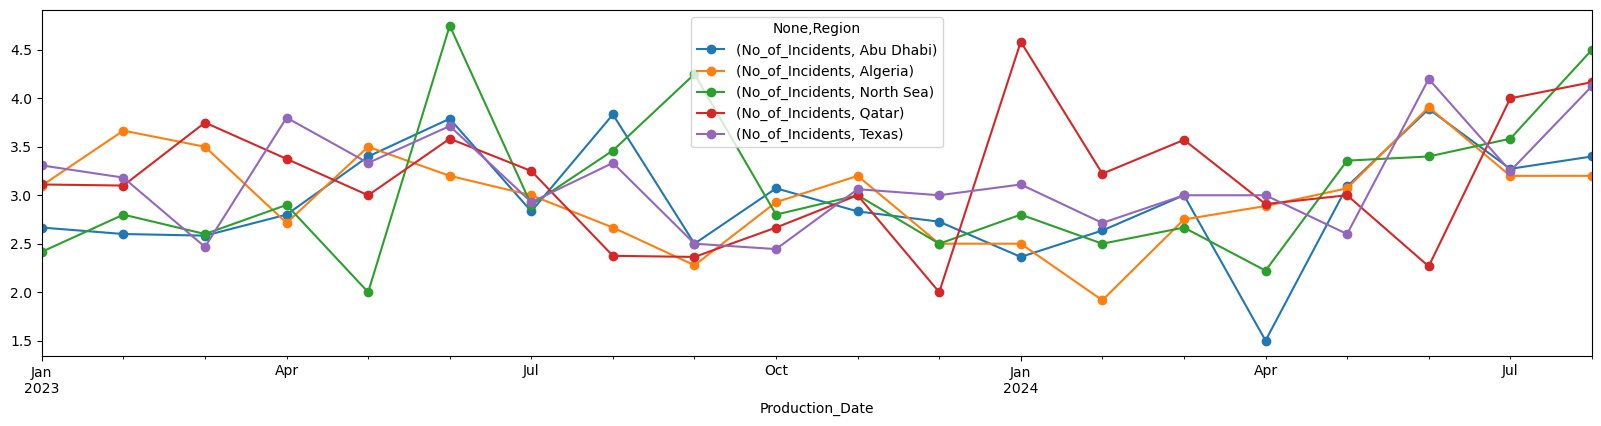

In [19]:
groupby_month_weather.plot(figsize = (20, 4.5), style = 'o-');




> All these steps have enabled us to represent the evolution over time of the average number of incidents, differentiating according to region.






# Qualitative and Temporal Data Analysis

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the enhanced dataset
df = pd.read_csv('./data/OilWell_Quali_Temporal.csv')

# Quick look
display(df.head())
display(df.info())
display(df.describe(include='all'))

## Qualitative Variables Analysis


=== Well_ID ===
W-001    1
W-672    1
W-659    1
W-660    1
W-661    1
W-662    1
W-663    1
W-664    1
W-665    1
W-666    1
Name: Well_ID, dtype: int64


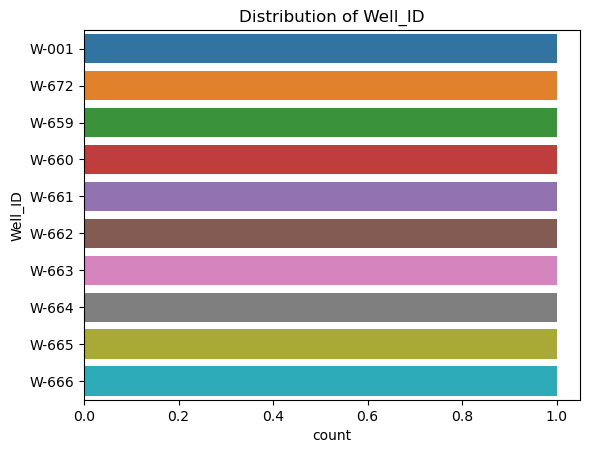


=== Region ===
Abu Dhabi    210
Qatar        206
Algeria      204
North Sea    190
Texas        190
Name: Region, dtype: int64


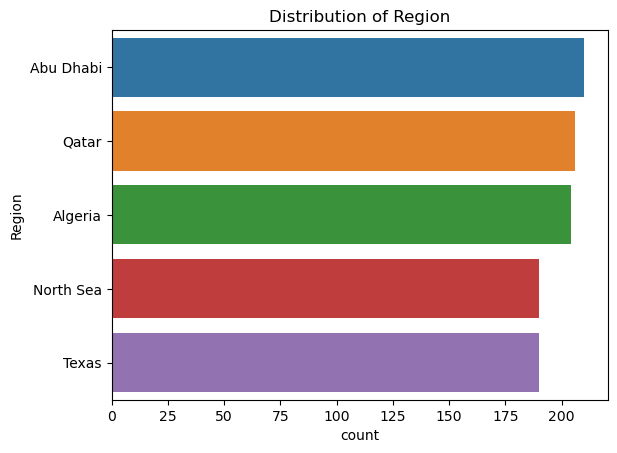


=== Operator ===
Shell            211
Chevron          205
TotalEnergies    205
BP               190
ExxonMobil       189
Name: Operator, dtype: int64


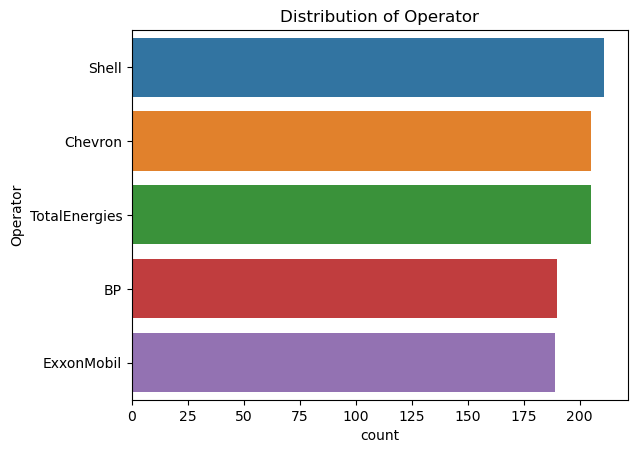


=== Maintenance_Type ===
Corrective    345
Routine       339
Emergency     316
Name: Maintenance_Type, dtype: int64


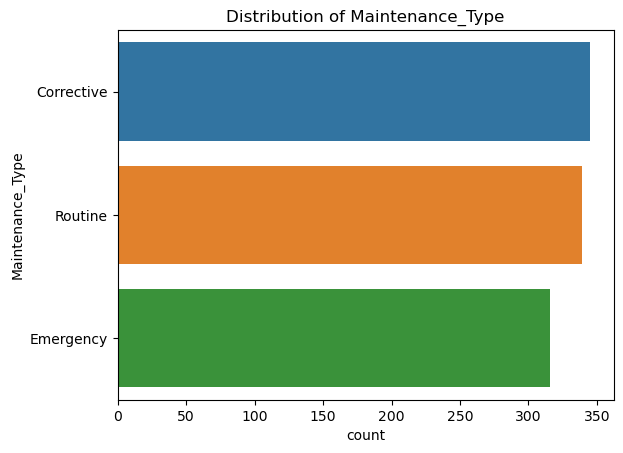


=== Shift ===
Day      523
Night    477
Name: Shift, dtype: int64


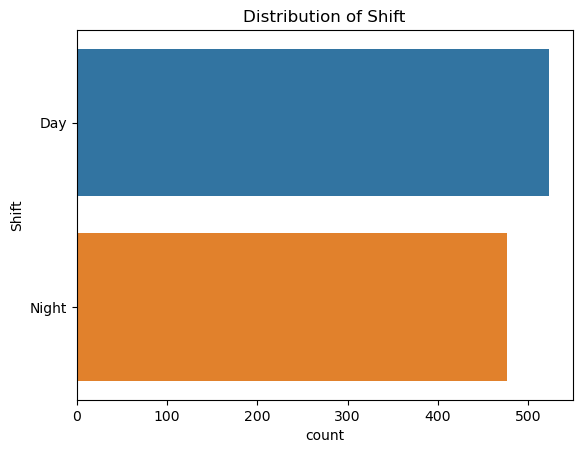


=== Equipment_Status ===
Active     344
Failure    332
Standby    324
Name: Equipment_Status, dtype: int64


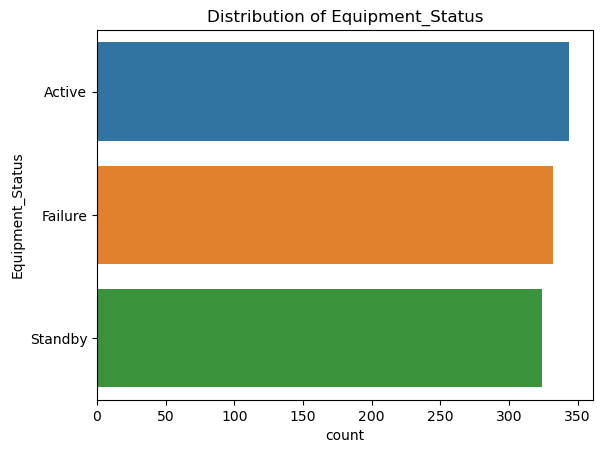


=== Weather_Condition ===
Windy        218
Sandstorm    204
Cloudy       203
Rainy        194
Sunny        181
Name: Weather_Condition, dtype: int64


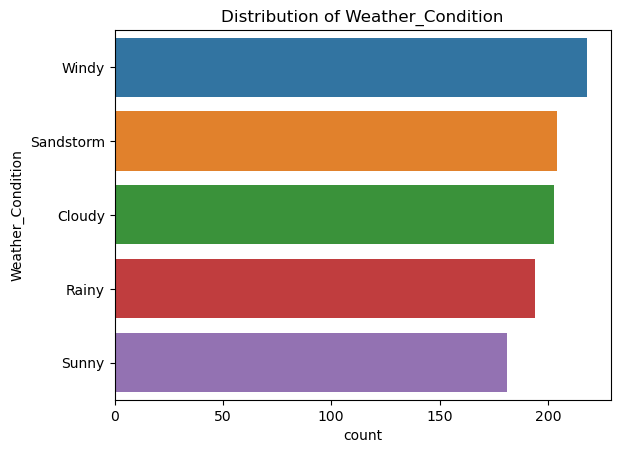


=== Alert_Level ===
High        264
Low         252
Medium      252
Critical    232
Name: Alert_Level, dtype: int64


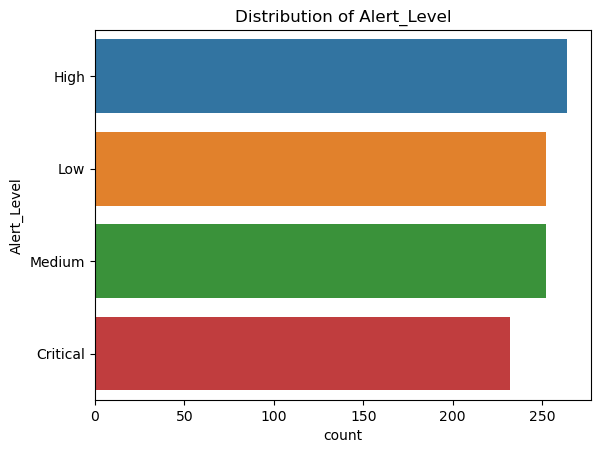

In [23]:
# Frequency analysis of categorical variables
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts().head(10))
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Distribution of {col}")
    plt.show()

## Temporal Analysis

In [ ]:
# Convert date columns
df['Production_Date'] = pd.to_datetime(df['Production_Date'])
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'])

# Sort by date
df = df.sort_values('Production_Date')

# Compute daily averages of numeric variables
numeric_cols = df.select_dtypes(include='number').columns
daily_mean = df.groupby('Production_Date')[numeric_cols].mean()

# Plot evolution of key metrics
daily_mean[['No_of_Incidents', 'Production_Barrels']].plot(figsize=(10,5))
plt.title('Evolution of Incidents and Production Over Time')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.show()

## Combining Temporal and Qualitative Insights

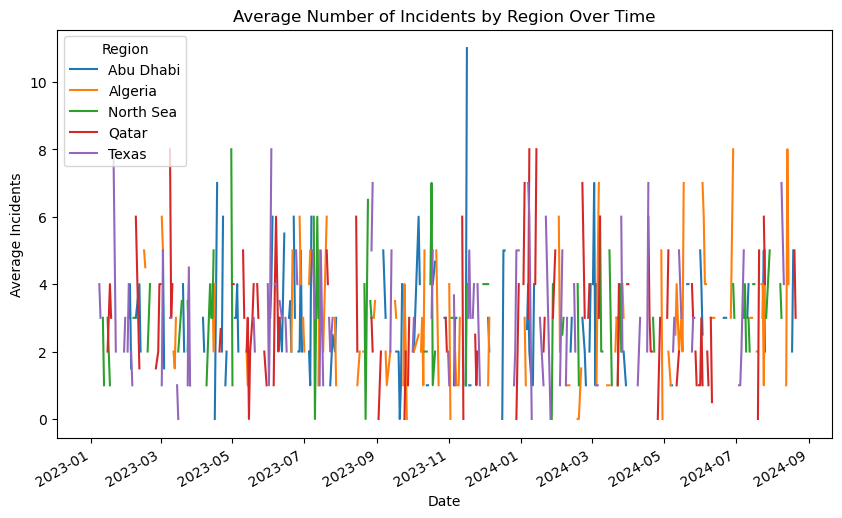

In [22]:
# Example: Average incidents per region over time
region_trends = df.groupby(['Production_Date', 'Region'])['No_of_Incidents'].mean().unstack()
region_trends.plot(figsize=(10,6))
plt.title('Average Number of Incidents by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Average Incidents')
plt.show()